<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

Explorean end-to-end workflow.

In [26]:
what_to_cover = {
    1: "data (prep and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_to_cover

{1: 'data (prep and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [27]:
import torch
from torch import nn # nn contains all the lego pice for PyTorch neural network
import matplotlib.pyplot as plt

# Check verion
torch.__version__

'2.5.1+cu121'

# Data, prep and load

Data can be almost anything... in ML

* Excel spredsheet
* Images
* Videos
* Audio
* DNA data
* Text
...

Machine lerning is a game of two main parts:
1. Get data into numerical representation.
2. Build. amodel to learn patterns in that numerical data.

To showcase this, let's create some **known** data using the linear regression formula.
We'll use a linear regression formula to make a straight line with known **parameters**.

## Example for regression problems

A regression problem predicts numbers based on patterns in data. For example:

House prices: Predict how much a house costs based on its size and location.
* Weather: Predict tomorrow's temperature.
* Salary: Estimate a person's salary based on years of experience.

It’s like guessing a number based on clues!

# Linear regression

This is the equation of a straight line:

* Y: The value you want to predict (output).
* X: The input or feature (e.g., hours studied).
* a: The intercept (where the line crosses the Y-axis). AKA -> bias
* b: The slope (how much Y changes when X increases by 1). AKA -> wight

It shows the relationship between X and Y!
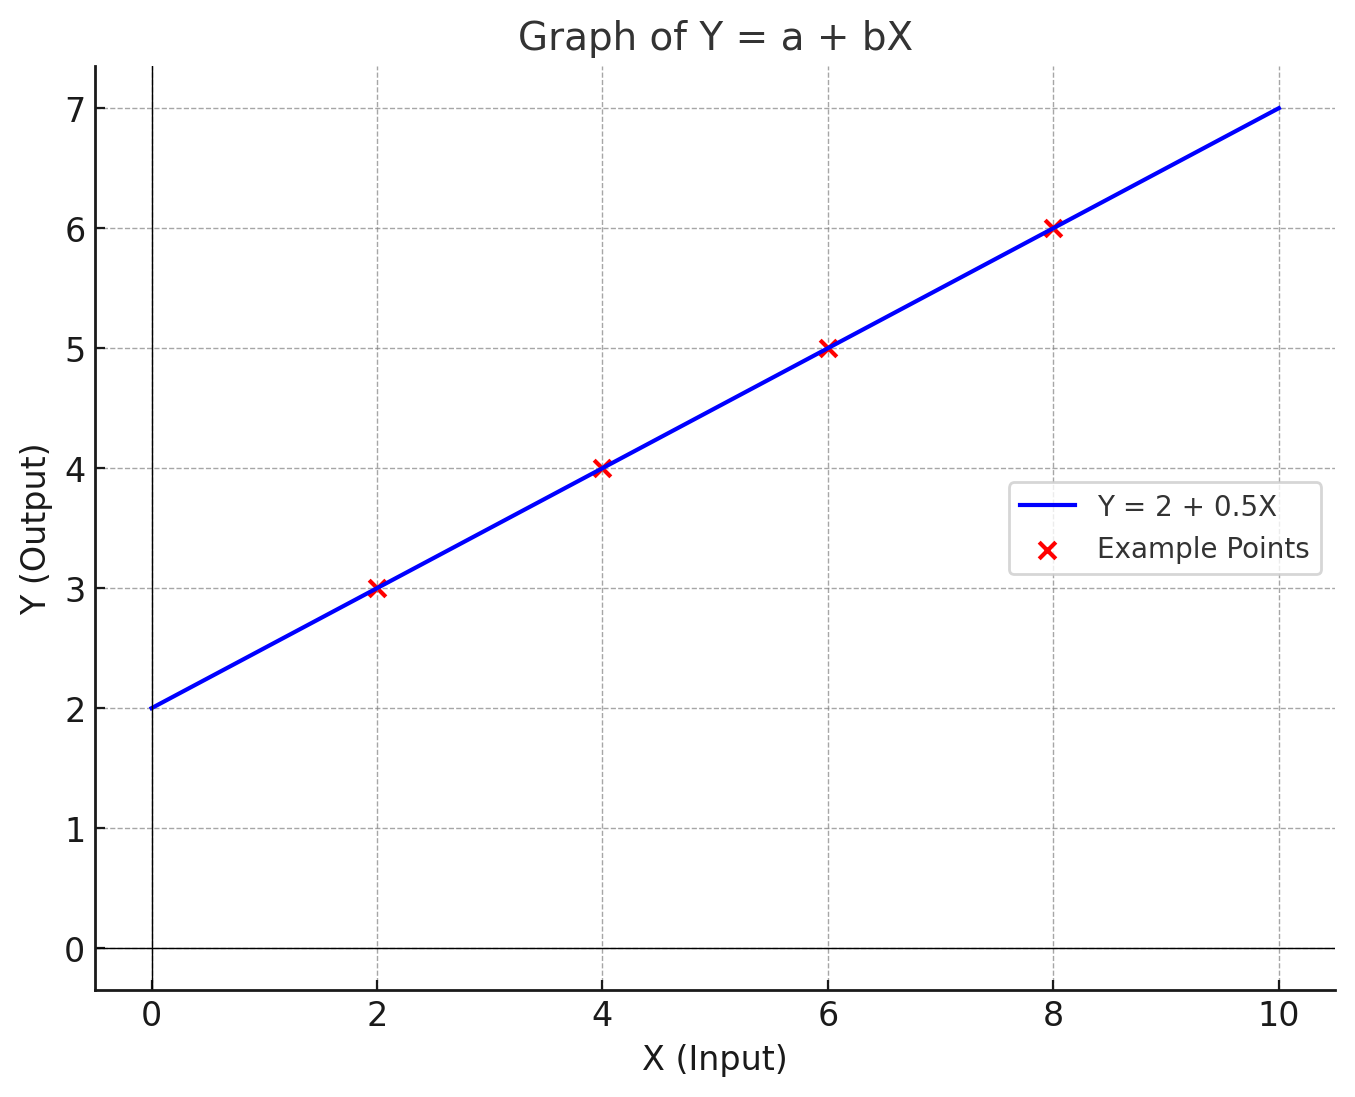

In [28]:
# Create the *known* parameters

weight = 0.7 # = b <-- the angle of the slope how step its climbing or declineing based on + or - number
bias = 0.3 # = a <-- the starting point where the line coross Y axis

# Create tensor

start = 0
end = 1
step = 0.02

# X represent: --> input feature, like each step "0.02" the value will increase with weight "0.7" this way creating a strait line that go upwards that crossing Y axis at "0.3" <- bias
X = torch.arange(start, end, step).unsqueeze(dim=1) # capital leter represent a matrix or a tensor (we create an array and add extra dimension to each element in it)
print(X.shape)
#print(X)

y = bias + weight * X  # lower case represent a vector, FORMULA: Y = a + bX ()

print(len(X), len(y))
X[:10], y[:10]

torch.Size([50, 1])
50 50


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Spliting data in to training and test sets (one of the most important concept in ML)

We need to split our data in to 3 main set.
* Training set ~ roughly 60-80%
* Validation set ~ roughly 10-20% (`this is optional`)
* Test set ~ roughly 10-20%

We working on the model to generalise well. AKA -> The model to perform well on data it never see before.

In [29]:
# Create a train/test split

train_split = int(0.8 * len(X)) # 80% of data

X_train, y_train = X[:train_split], y[:train_split] # split X and y array from start-> to->80%
X_test, y_test = X[train_split:], y[train_split:] # split X and y array from->80% to->end

# How might we better visualize our data?

We use "matplotlib" for this.

In [30]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot it
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


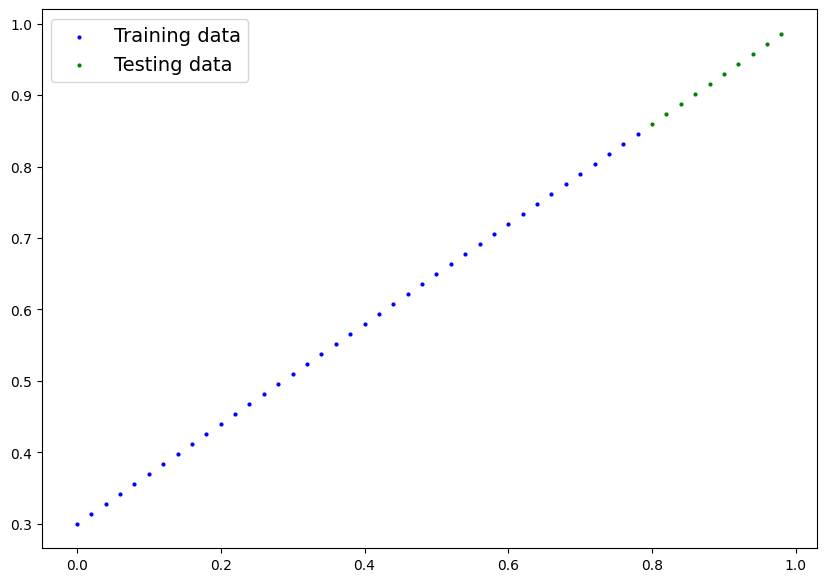

In [31]:
plot_predictions()

# Build a simple model for this problem

What the model do:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias values we used to create the data)

How does it do so?:
1. Gradient descent https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation https://www.youtube.com/watch?v=Ilg3gGewQ5U


In [32]:
# Create a linear regression model class

class LinearRegressionModelV1(nn.Module): # <-- amost everyting is coming from nn.Module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:  # <-- "x" is the input data
    return self.weight * x + self.bias

# PyThorch model building essentials

* torch.nn - base, base class where all the funcions are
* torch.nn.Parameter - what parameters our model try and learn, often a PyThorch layer from torch.nn will set these for us
* torch.nn.Module - base class for all neural network modules
* torch.optim - this where the optimizers live, they will help with gradient decent
* def forward() - All nn.Model subclasses require you to overide this function. This method defines what logic happen in the forward computation


# Checking the content of our PyTorch model

We can check our model parameters or what inside our model using `.parameters()`

In [33]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (subclass)
model_0 = LinearRegressionModelV1()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
# Listed name params
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [35]:
weight, bias

(0.7, 0.3)

# Make a prediction using `torch.inference_mode()` or `torch.no_grad()`

Check out model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through `forward()` method.

Inference mode turn off the gradient tracking, this way optimise the data for predictions, and graps as there is may les things to handle. It give you only the data. This is a type of optimizition.

In [36]:
# Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

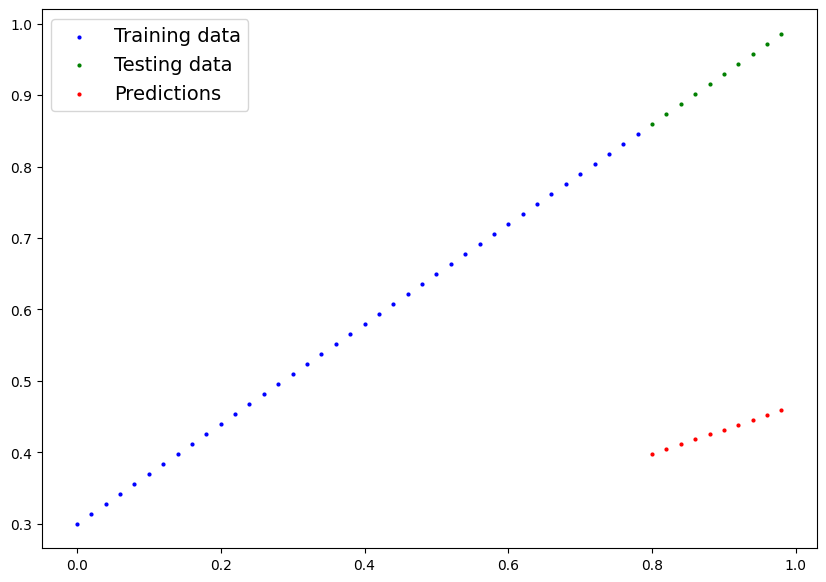

In [37]:
# Try to plot it how it look like
plot_predictions(predictions=y_preds)

# Train model

The idea of training a model is move the parameters from **unknown** value to a **known** value.
In other words from a poor representation of data to a better representation of the data.

# Measure the model performance in accuracy (AKA: cost function, loss function, criterion ...)

We need to use a loss function. To calculate how fare its off from the target.

# Thing we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal output, lower is better.
* **Optimiser:** Take into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) in this case to improve the loss function outcome.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [38]:
# Set up a loss function
loss_fn = nn.L1Loss() # MAE = L1Loss

# Set up an optimizer (SGD) <-- we use here "stochastic gradient descent" <-- "SGD adds randomness by using subsets of the data for gradient computation. This helps reduce computational cost and improves the chances of avoiding poor local minima, making it more likely to find a better loss valley."
optimizer = torch.optim.SGD(params=model_0.parameters(), # model parameters
                            lr=0.01) # learning rate

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
For example, for a regression problem, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.
But for a classification problem like classifying whether a photo is a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

# Building a training loop in PyTorch and a testing loop.

A few things we need in training loop:

0. - Loop over the data
1. - Forward pass (this involves data moving through our model's `forward()` functions) also called forward propagation. To make prediction on data.
2. - Calculate the loss (compare forward pass predictions to ground truth labels)
3. - Optimize the zero grad
4. - Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. - Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss to be minimal (**gradient descent**)

In [56]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparamether because we've set it ourselves)
epochs = 100

### Training
# 0. Loop over the data
for epoch in range(epochs):
  model_0.train() # put model in training mode, in PyThorc set all parameters that require gradienst to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train) # Predict the y values based on x traing data

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) # Validate the loss based on y pedicted and y traing data values
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad() # Reset the values of the optimizer, so each iteration is looking at the current iteration data!

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we need to zero them above in step 3 for next iteration of the loop

  ### Testing
  model_0.eval() # turns off gradient tracking



Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Loss: 0.08227583020925522
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747635453939438
Loss: 0.06395438313484192
Loss: 0.06097004935145378
Loss: 0.05845819041132927
Loss: 0.05635259300470352
Loss: 0.0545857772231102
Loss: 0.053148526698350906
Loss: 0.05181945487856865
Loss: 0.05069301277399063
Loss: 0.0498228520154953
Loss: 0.04895269125699997
Loss: 0.04819351062178612
Loss: 0.047531817108392715
Loss: 0.04692792519927025
Loss: 0.04642331600189209
Loss: 0.04591871052980423
Loss: 0.04543796554207802
Loss: 0.04503796249628067
Loss: 0.04463795945048332
Loss: 0.04423796385526657
Loss: 0.04383796453475952
Loss: 0.04343796148896217
Loss: 0.043074630200862885
Loss: 0.04272563382983208
Loss: 0.04237663000822067
Loss: 0.04202762991189957
Loss: 0.04167863354086876
Loss: 0.04132963344454765
Loss: 0.04098063334822655
Loss: 0.04063

In [59]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6040])), ('bias', tensor([0.3403]))])

In [58]:
# Make a prediction

with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8235],
        [0.8356],
        [0.8476],
        [0.8597],
        [0.8718],
        [0.8839],
        [0.8960],
        [0.9080],
        [0.9201],
        [0.9322]])

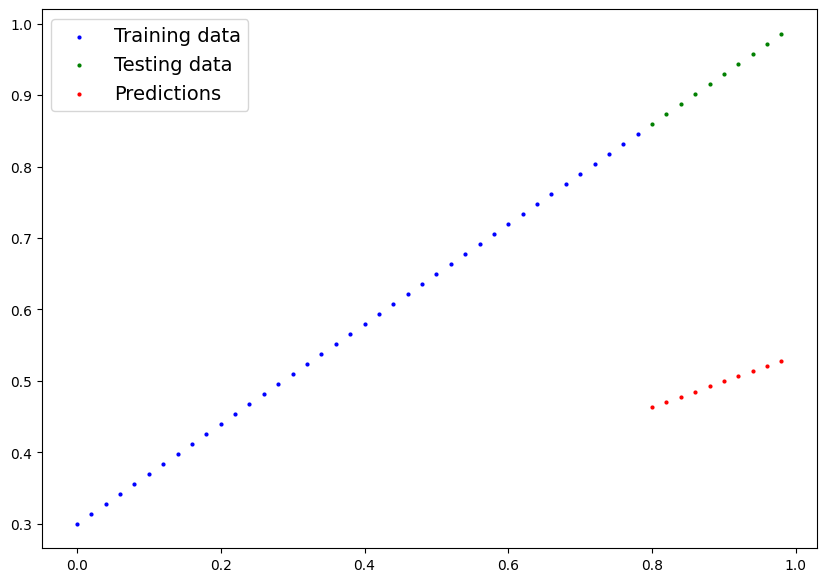

In [54]:
# Plot before training
plot_predictions(predictions=y_preds)

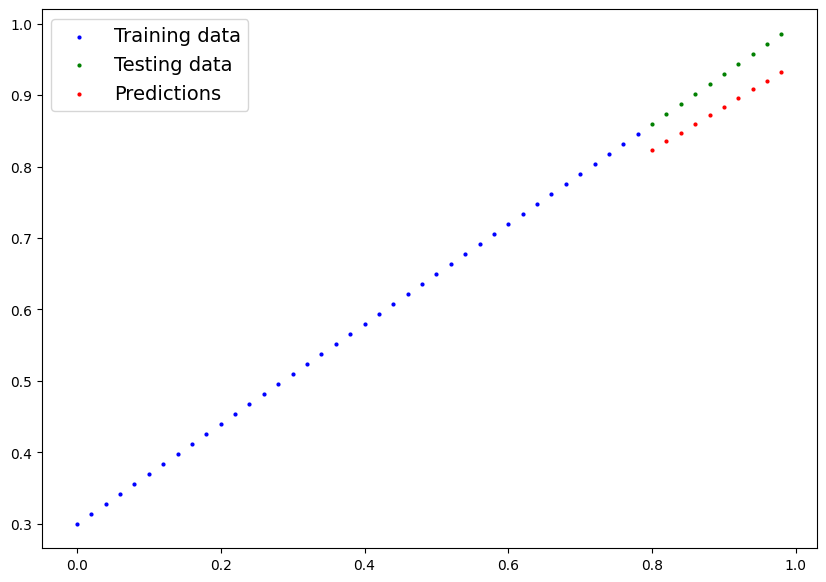

In [60]:
# Plot after training
plot_predictions(predictions=y_preds_new)